In [1]:
using CSV, Tables
using DelimitedFiles, DataFrames
using Statistics
import PyPlot as plt
using Plots
using GLM
using ShiftedArrays
using PyCall
using PlotlyJS
using FinancialToolbox
using FinancialDerivatives
using RCall
using LsqFit
using BusinessDays, Dates
using LaTeXStrings

yf = pyimport("yfinance")

WebIO._IJuliaInit()

PyObject <module 'yfinance' from '/home/aidin/anaconda3/lib/python3.8/site-packages/yfinance/__init__.py'>

In [2]:
K = 100
r = .01
vol = 0.2

S = collect(60:5:140)
T = vcat(collect(.1:.1:.9), collect(1:1:5))

price1  = Array{Float64}(undef, length(S), length(T))
delta1  = Array{Float64}(undef, length(S), length(T))
gamma1  = Array{Float64}(undef, length(S), length(T))
theta1  = Array{Float64}(undef, length(S), length(T))
vega1   = Array{Float64}(undef, length(S), length(T))
rho1    = Array{Float64}(undef, length(S), length(T))
lambda1 = Array{Float64}(undef, length(S), length(T))
psi1    = Array{Float64}(undef, length(S), length(T))
vanna1  = Array{Float64}(undef, length(S), length(T))
impv1   = Array{Float64}(undef, length(S), length(T))

for i in 1:length(S), j in 1:length(T)
    price1[i,j]  = blsprice( S[i], K, r, T[j], vol)
    delta1[i,j]  = blsdelta( S[i], K, r, T[j], vol)
    gamma1[i,j]  = blsgamma( S[i], K, r, T[j], vol)
    theta1[i,j]  = blstheta( S[i], K, r, T[j], vol)
    vega1[i,j]   = blsvega(  S[i], K, r, T[j], vol)
    rho1[i,j]    = blsrho(   S[i], K, r, T[j], vol)
    lambda1[i,j] = blslambda(S[i], K, r, T[j], vol)
    psi1[i,j]    = blspsi(   S[i], K, r, T[j], vol)
    vanna1[i,j]  = blsvanna( S[i], K, r, T[j], vol)
    impv1[i,j]   = blsimpv(  S[i], K, r, T[j], price1[i,j] )
end

In [3]:
my_cg = cgrad([:blue, :orange])

ColorGradient(RGBA{Float64}[RGBA{Float64}(0.0,0.0,1.0,1.0), RGBA{Float64}(1.0,0.6470588235294118,0.0,1.0)], [0.0, 1.0])

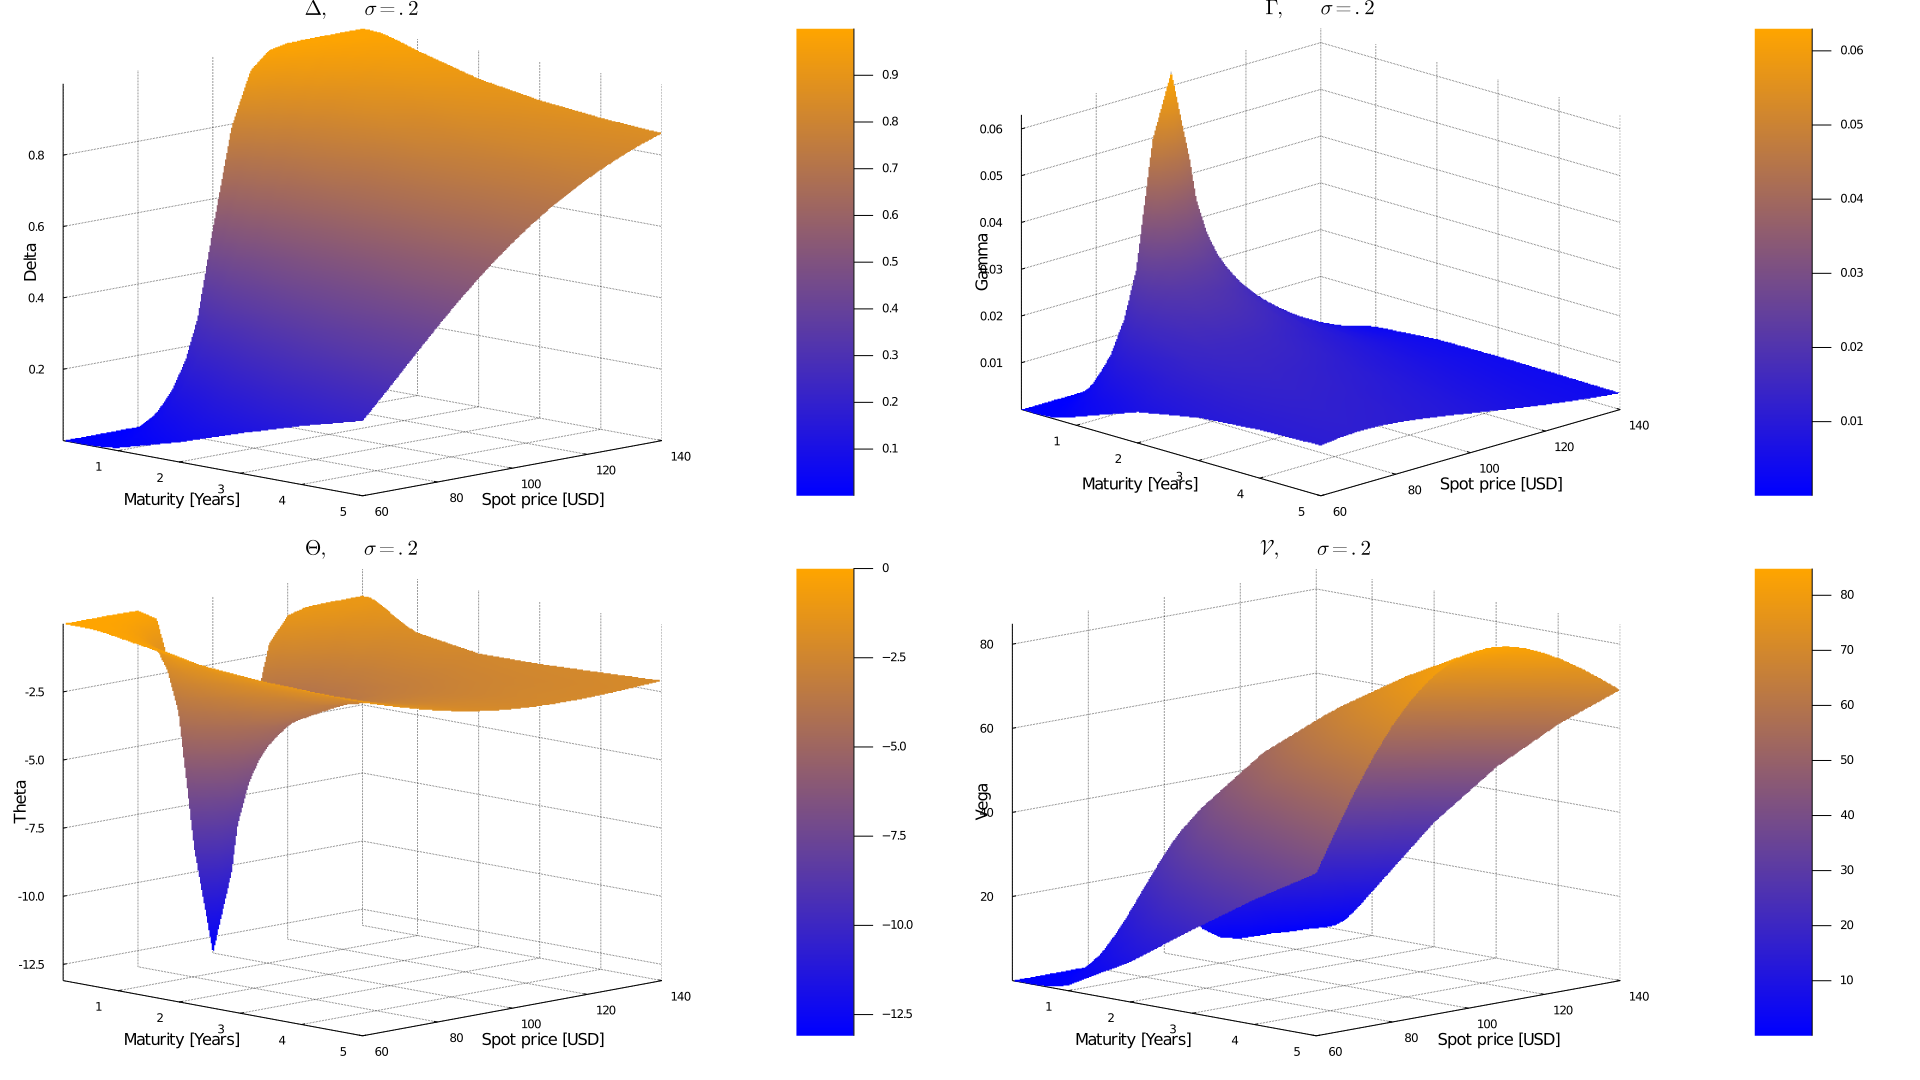

In [4]:
plot_price1 = Plots.plot(title = L"Price,\quad\quad\sigma=.2",T, S, price1,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Call Option Price [USD]")
plot_delta1 = Plots.plot(title = L"\Delta,\quad\quad\sigma=.2",T, S, delta1,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Delta")
plot_gamma1 = Plots.plot(title = L"\Gamma,\quad\quad\sigma=.2",T, S, gamma1,color=my_cg,st=:surface, camera=(45,45), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Gamma")
plot_theta1 = Plots.plot(title = L"\Theta,\quad\quad\sigma=.2",T, S, theta1,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Theta")
plot_vega1  = Plots.plot(title = L"\mathcal{V},\quad\quad\sigma=.2",T, S, vega1, st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Vega")
plot_impv1  = Plots.plot(T, S, impv1, color=my_cg,st=:surface, camera=(45,45), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Implied volatility")

Plots.plot(plot_delta1, plot_gamma1, plot_theta1, plot_vega1, layout = (2, 2), size = (1920, 1080))
Plots.plot!(#gridcolor=:green,
            gridlinestyle=:dot,
            gridlinewidth=1,
            gridalpha=0.8)


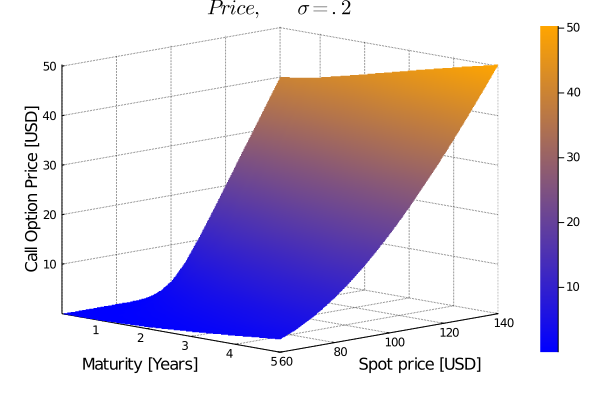

In [5]:
Plots.plot(plot_price1)
Plots.plot!(#gridcolor=:green,
            gridlinestyle=:dot,
            gridlinewidth=1,
            gridalpha=0.8)


In [6]:
K = 100
r = .01
vol = 0.75

S = collect(60:5:140)
T = vcat(collect(.1:.1:.9), collect(1:1:5))

price2  = Array{Float64}(undef, length(S), length(T))
delta2  = Array{Float64}(undef, length(S), length(T))
gamma2  = Array{Float64}(undef, length(S), length(T))
theta2  = Array{Float64}(undef, length(S), length(T))
vega2   = Array{Float64}(undef, length(S), length(T))
rho2    = Array{Float64}(undef, length(S), length(T))
lambda2 = Array{Float64}(undef, length(S), length(T))
psi2    = Array{Float64}(undef, length(S), length(T))
vanna2  = Array{Float64}(undef, length(S), length(T))
impv2   = Array{Float64}(undef, length(S), length(T))

for i in 1:length(S), j in 1:length(T)
    price2[i,j]  = blsprice( S[i], K, r, T[j], vol)
    delta2[i,j]  = blsdelta( S[i], K, r, T[j], vol)
    gamma2[i,j]  = blsgamma( S[i], K, r, T[j], vol)
    theta2[i,j]  = blstheta( S[i], K, r, T[j], vol)
    vega2[i,j]   = blsvega(  S[i], K, r, T[j], vol)
    rho2[i,j]    = blsrho(   S[i], K, r, T[j], vol)
    lambda2[i,j] = blslambda(S[i], K, r, T[j], vol)
    psi2[i,j]    = blspsi(   S[i], K, r, T[j], vol)
    vanna2[i,j]  = blsvanna( S[i], K, r, T[j], vol)
    impv2[i,j]   = blsimpv(  S[i], K, r, T[j], price2[i,j] )
end

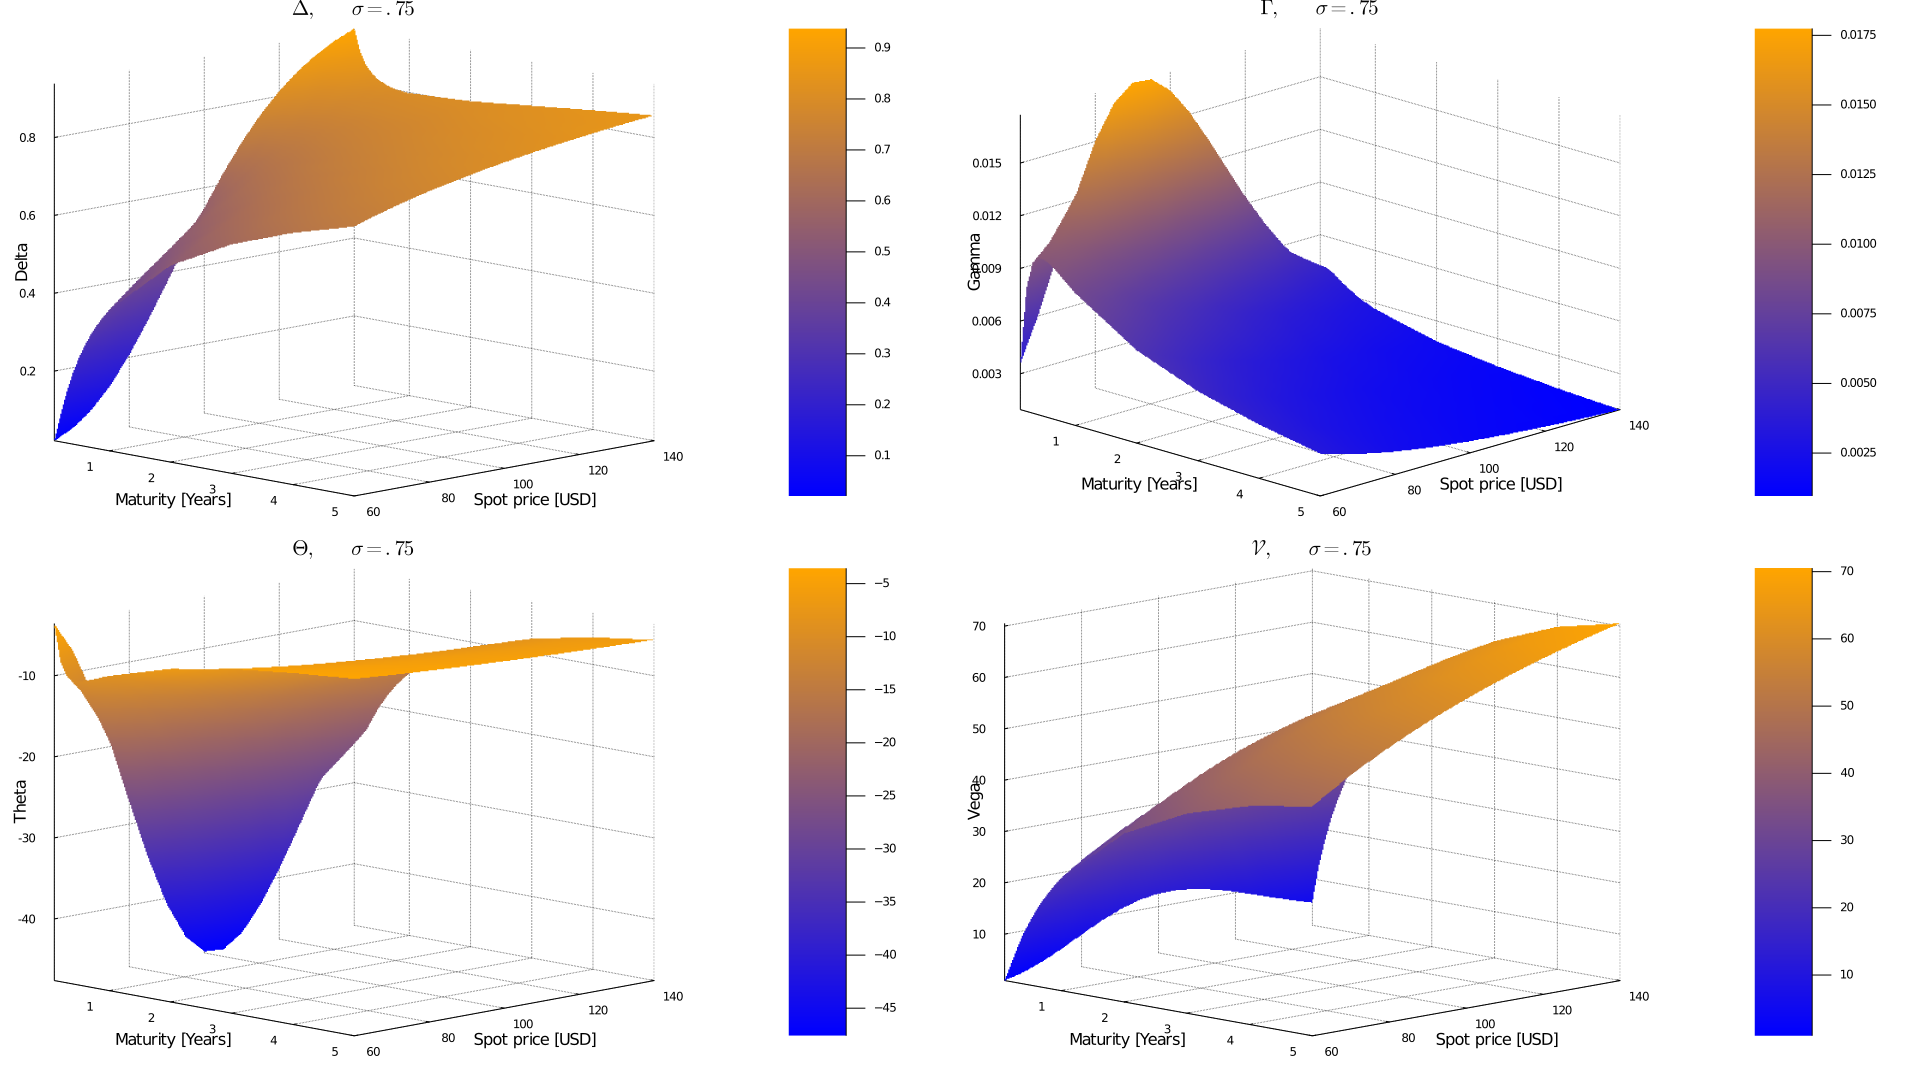

In [7]:
plot_price2 = Plots.plot(title = L"Price,\quad\quad\sigma=.75"      ,T, S, price2,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Call Option Price [USD]")
plot_delta2 = Plots.plot(title = L"\Delta,\quad\quad\sigma=.75"     ,T, S, delta2,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Delta")
plot_gamma2 = Plots.plot(title = L"\Gamma,\quad\quad\sigma=.75"     ,T, S, gamma2,color=my_cg,st=:surface, camera=(45,45), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Gamma")
plot_theta2 = Plots.plot(title = L"\Theta,\quad\quad\sigma=.75"     ,T, S, theta2,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Theta")
plot_vega2  = Plots.plot(title = L"\mathcal{V},\quad\quad\sigma=.75",T, S, vega2, st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Vega")
plot_impv2  = Plots.plot(T, S, impv2, color=my_cg,st=:surface, camera=(45,45), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Implied volatility")




Plots.plot(plot_delta2, plot_gamma2, plot_theta2, plot_vega2, layout = (2, 2), size = (1920, 1080))
Plots.plot!(#gridcolor=:green,
            gridlinestyle=:dot,
            gridlinewidth=1,
            gridalpha=0.8)

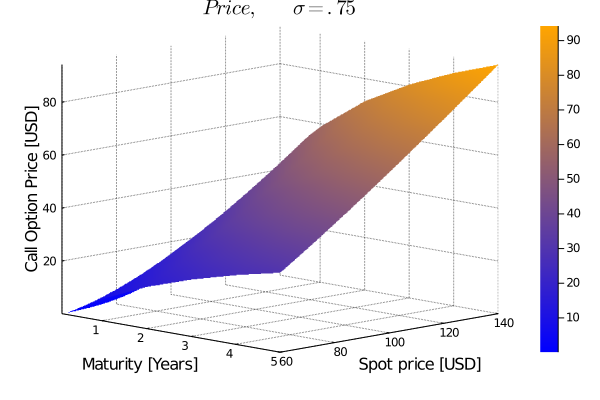

In [8]:
Plots.plot(plot_price2)
Plots.plot!(#gridcolor=:green,
            gridlinestyle=:dot,
            gridlinewidth=1,
            gridalpha=0.8)


In [9]:
K = 100
r = .01
vol = 0.05

S = collect(60:5:140)
T = vcat(collect(.1:.1:.9), collect(1:1:5))

price3  = Array{Float64}(undef, length(S), length(T))
delta3  = Array{Float64}(undef, length(S), length(T))
gamma3  = Array{Float64}(undef, length(S), length(T))
theta3  = Array{Float64}(undef, length(S), length(T))
vega3   = Array{Float64}(undef, length(S), length(T))
rho3    = Array{Float64}(undef, length(S), length(T))
lambda3 = Array{Float64}(undef, length(S), length(T))
psi3    = Array{Float64}(undef, length(S), length(T))
vanna3  = Array{Float64}(undef, length(S), length(T))
#impv   = Array{Float64}(undef, length(S), length(T))

for i in 1:length(S), j in 1:length(T)
    price3[i,j]  = blsprice( S[i], K, r, T[j], vol)
    delta3[i,j]  = blsdelta( S[i], K, r, T[j], vol)
    gamma3[i,j]  = blsgamma( S[i], K, r, T[j], vol)
    theta3[i,j]  = blstheta( S[i], K, r, T[j], vol)
    vega3[i,j]   = blsvega(  S[i], K, r, T[j], vol)
    rho3[i,j]    = blsrho(   S[i], K, r, T[j], vol)
    lambda3[i,j] = blslambda(S[i], K, r, T[j], vol)
    psi3[i,j]    = blspsi(   S[i], K, r, T[j], vol)
    vanna3[i,j]  = blsvanna( S[i], K, r, T[j], vol)
#    impv[i,j]   = blsimpv(  S[i], K, r, T[j], price[i,j] )
end

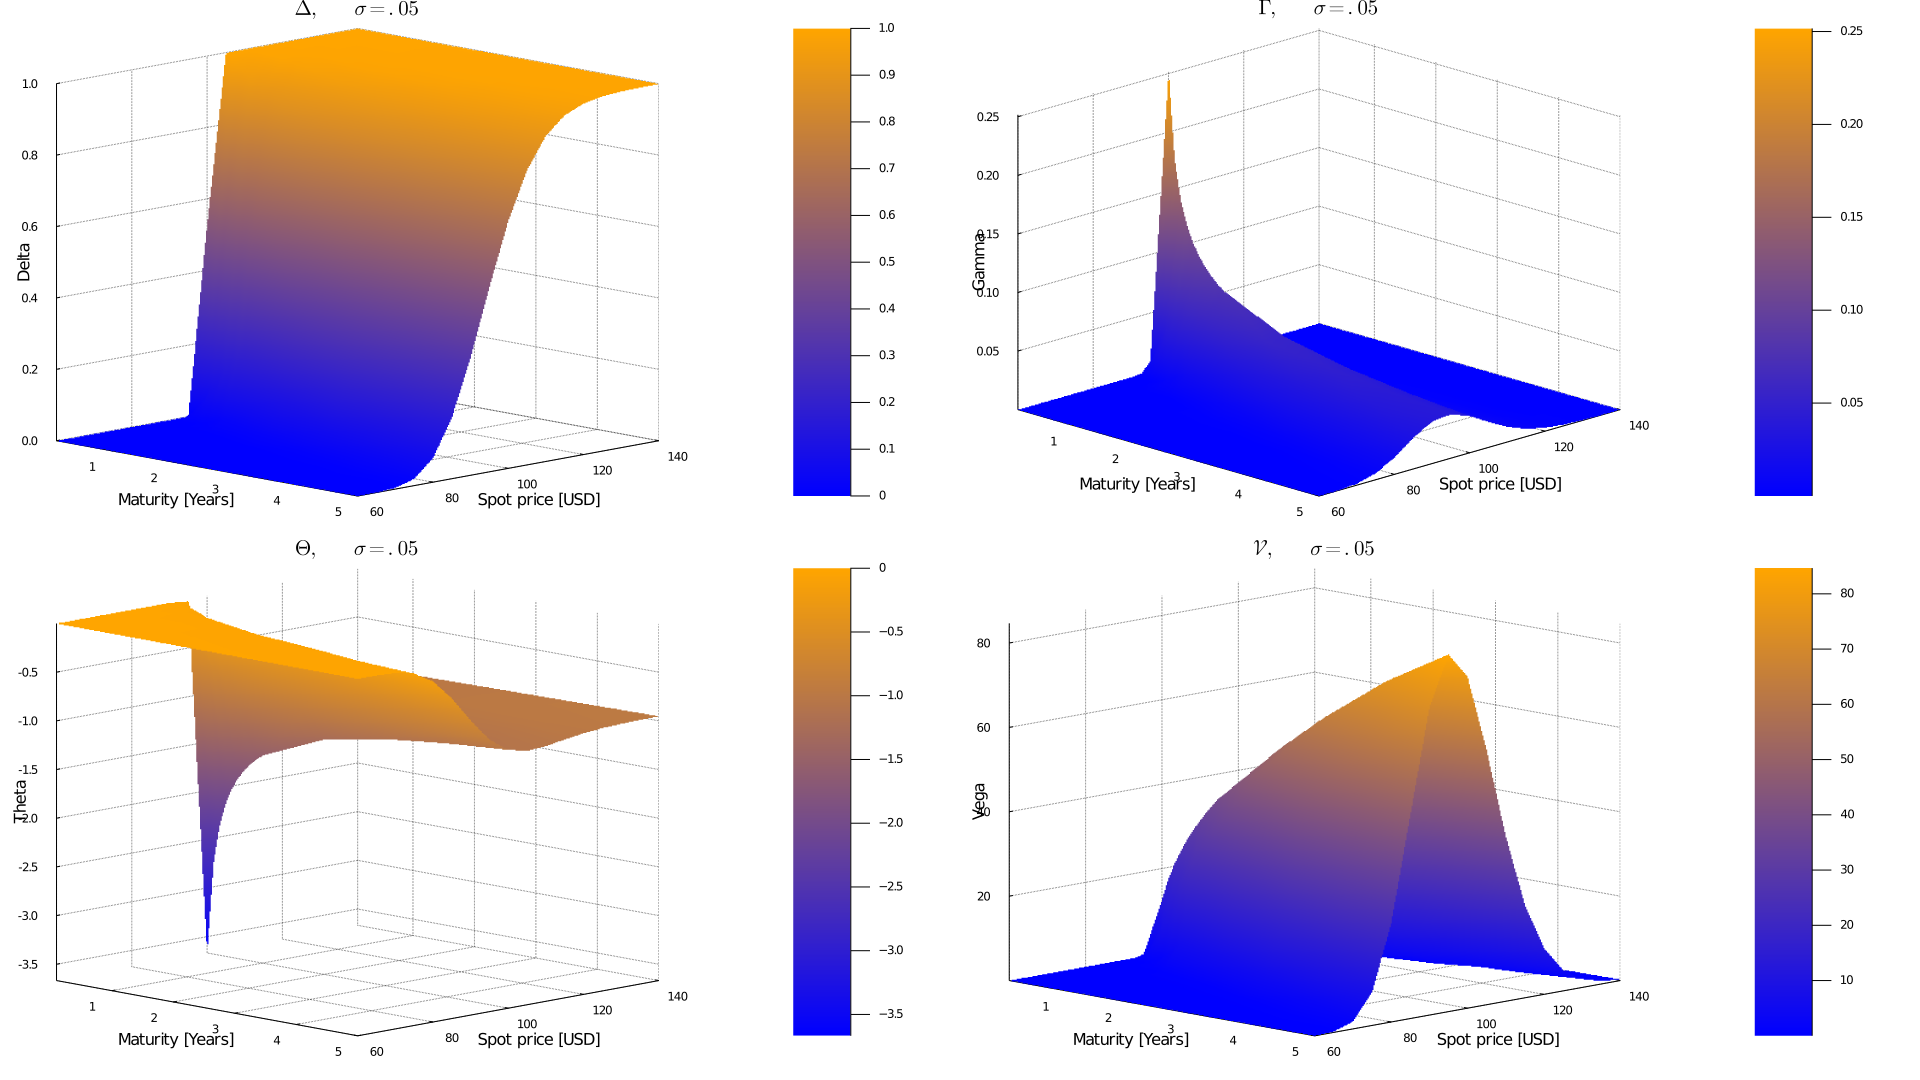

In [10]:
plot_price3 = Plots.plot(title = L"Price,\quad\quad\sigma=.05"      , T, S, price3,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Call Option Price [USD]")
plot_delta3 = Plots.plot(title = L"\Delta,\quad\quad\sigma=.05"     , T, S, delta3,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Delta")
plot_gamma3 = Plots.plot(title = L"\Gamma,\quad\quad\sigma=.05"     , T, S, gamma3,color=my_cg,st=:surface, camera=(45,45), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Gamma")
plot_theta3 = Plots.plot(title = L"\Theta,\quad\quad\sigma=.05"     , T, S, theta3,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Theta")
plot_vega3  = Plots.plot(title = L"\mathcal{V},\quad\quad\sigma=.05", T, S, vega3, st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Vega")

Plots.plot(plot_delta3, plot_gamma3, plot_theta3, plot_vega3, layout = (2, 2), size = (1920, 1080))
Plots.plot!(#gridcolor=:green,
            gridlinestyle=:dot,
            gridlinewidth=1,
            gridalpha=0.8)


In [11]:
Plots.plot(plot_delta3, plot_delta1, plot_delta2,
           plot_gamma3, plot_gamma1, plot_gamma2,
           plot_theta3, plot_theta1, plot_theta2,
           plot_vega3,   plot_vega1,  plot_vega2, layout = (4, 3), size = (1920, 1920))
Plots.plot!(gridlinestyle=:dot,
            gridlinewidth=1,
            gridalpha=0.8)
Plots.savefig("figures/Greeks_1.pdf")

In [12]:
Plots.plot(plot_price3, plot_price1, plot_price2, layout = (1, 3), size = (1920, 480))
Plots.plot!(gridlinestyle=:dot,
            gridlinewidth=1,
            gridalpha=0.8)
Plots.savefig("figures/Prices_1.pdf")

In [13]:
STOCK          = DataFrame(CSV.File("DATA/RUT.csv"))

S0             = STOCK.Close[length(STOCK.Close)]

CALL_OVERNIGHT = DataFrame(CSV.File("DATA/CALL_OVERNIGHT.csv"))
CALL_1MONTH    = DataFrame(CSV.File("DATA/CALL_1MONTH.csv"   ))
CALL_2MONTHS   = DataFrame(CSV.File("DATA/CALL_2MONTHS.csv"  ))
CALL_3MONTHS   = DataFrame(CSV.File("DATA/CALL_3MONTHS.csv"  ))
CALL_4MONTHS   = DataFrame(CSV.File("DATA/CALL_4MONTHS.csv"  ))
CALL_5MONTHS   = DataFrame(CSV.File("DATA/CALL_5MONTHS.csv"  ))
CALL_6MONTHS   = DataFrame(CSV.File("DATA/CALL_6MONTHS.csv"  ))
CALL_10MONTHS  = DataFrame(CSV.File("DATA/CALL_10MONTHS.csv" ))

PUT_OVERNIGHT  = DataFrame(CSV.File("DATA/PUT_OVERNIGHT.csv" ))
PUT_1MONTH     = DataFrame(CSV.File("DATA/PUT_1MONTH.csv"    ))
PUT_2MONTHS    = DataFrame(CSV.File("DATA/PUT_2MONTHS.csv"   ))
PUT_3MONTHS    = DataFrame(CSV.File("DATA/PUT_3MONTHS.csv"   ))
PUT_4MONTHS    = DataFrame(CSV.File("DATA/PUT_4MONTHS.csv"   ))
PUT_5MONTHS    = DataFrame(CSV.File("DATA/PUT_5MONTHS.csv"   ))
PUT_6MONTHS    = DataFrame(CSV.File("DATA/PUT_6MONTHS.csv"   ))
PUT_10MONTHS   = DataFrame(CSV.File("DATA/PUT_10MONTHS.csv"  ))

CALLS = [CALL_OVERNIGHT, CALL_1MONTH,  CALL_2MONTHS,
         CALL_3MONTHS,   CALL_4MONTHS, CALL_5MONTHS,
         CALL_6MONTHS,   CALL_10MONTHS]

INTEREST_RATES = [0.32814, 0.45514, 0.96686, 1.47200, 2.12586]

T              = [   1/252,     1/12,   2/12,     3/12,     4/12,     5/12,     6/12,    10/12]
r              = [.0032814, .0045514, .00711, .0096686, .0113524, .0130362, .0147200, .0179893]

8-element Vector{Float64}:
 0.0032814
 0.0045514
 0.00711
 0.0096686
 0.0113524
 0.0130362
 0.01472
 0.0179893

In [14]:
for j in 1:length(CALLS)
    
    if eltype(CALLS[j].Strike) == String
        CALLS[j].Strike = [parse(Float64,replace(CALLS[j].Strike[i], "," => "")) for i in 1:length(CALLS[j].Strike)]
    end
    
    if eltype(CALLS[j].Ask) == String
        tmp = Array{Union{Missing, Float64}}(undef, length(CALLS[j].Ask))
        for k in 1:length(tmp)
            if CALLS[j].Ask[k] == '-'
                tmp[k] = parse(Float64,replace(CALLS[j].Ask[k], "," => ""))
            else
                tmp[k] = missing
            end
        end
        CALLS[j].Ask = tmp
        tmp = nothing
    end
    
    if eltype(CALLS[j].Bid) == String
        tmp = Array{Union{Missing, Float64}}(undef, length(CALLS[j].Bid))
        for k in 1:length(tmp)
            if CALLS[j].Bid[k] == '-'
                tmp[k] = parse(Float64,replace(CALLS[j].Bid[k], "," => ""))
            else
                tmp[k] = missing
            end
        end
        CALLS[j].Bid = tmp
        tmp = nothing
    end
        
    tmp = Array{Float64}(undef, length(CALLS[j]."Implied Volatility"))
    for k in 1:length(CALLS[j]."Implied Volatility")
        tmp[k] = parse(Float64,replace(CALLS[j]."Implied Volatility"[k], "%" => ""))
    end
    CALLS[j]."Implied Volatility" = tmp
end

In [15]:
function Mid_Price( df )
    df[!,:Mid_Price] = ( df.Ask .+ df.Bid ) ./ 2
end

for i in 1:length(CALLS)
    Mid_Price(CALLS[i])
end

In [16]:
impv = [Array{Union{Missing, Float64}}(undef, length(CALLS[i].Strike)) for i in 1:length(CALLS)]
for j in 1:length(CALLS)
    for i in 1:length(CALLS[j].Strike)
        try
            impv[j][i] = blsimpv(S0, CALLS[j].Strike[i], r[j], T[j], CALLS[j].Mid_Price[i])
        catch y
            impv[j][i] = missing
        end
    end
end

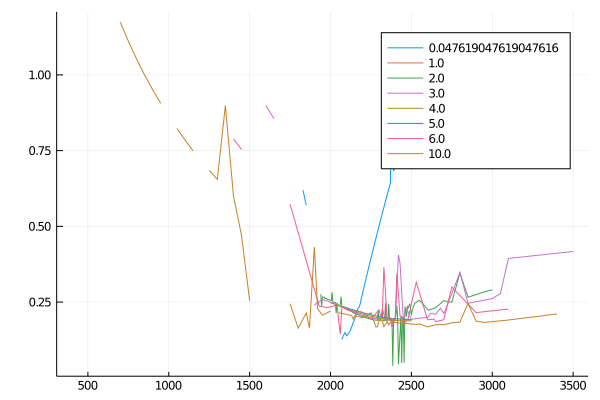

In [17]:
a = Plots.plot(CALLS[1].Strike, replace(impv[1], missing=>NaN), label=string(T[1]*12))
for i in 2:length(CALLS)
    Plots.plot!(CALLS[i].Strike, replace(impv[i], missing=>NaN), label=string(T[i]*12))
end
display(a)

In [18]:
Strikes = []
for i in 1:length(CALLS)
    Strikes = vcat(Strikes, CALLS[i].Strike)
end
Strikes .= clamp.(Strikes, 1250, 2750) 
Strikes = sort(unique(Strikes))

149-element Vector{Any}:
 1250
 1300.0
 1350.0
 1400.0
 1450.0
 1500.0
 1550.0
 1600.0
 1650.0
 1700.0
 1750.0
 1800.0
 1810.0
    ⋮
 2630.0
 2640.0
 2650
 2660.0
 2670.0
 2680.0
 2700.0
 2710.0
 2720.0
 2730
 2740
 2750.0

In [19]:
impv_mat = Array{Union{Missing, Float64}}(undef, length(Strikes), length(CALLS)-1)
for i in 1:length(CALLS)-1
    for j in 1:length(Strikes)
        a = -1
        for k in 1:length(CALLS[i+1].Strike)
            if CALLS[i+1].Strike[k] == Strikes[j]
                a = k
                break
            end
        end
        impv_mat[j,i] = a == -1 ? missing : impv[i+1][a]
    end
end

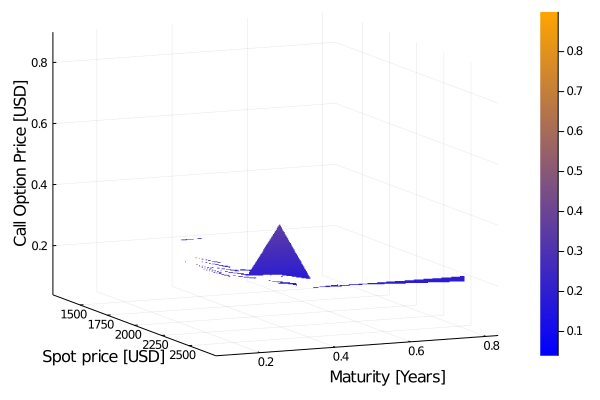

In [20]:
Plots.plot(Strikes, T[2:length(T)], replace(impv_mat, missing=>NaN),st=:surface,color=my_cg, camera=(60,30), xlabel="Spot price [USD]", ylabel="Maturity [Years]", zlabel="Call Option Price [USD]")

In [21]:
impv_real = [Array{Union{Missing, Float64}}(undef, length(CALLS[i].Strike)) for i in 1:length(CALLS)]
for j in 1:length(CALLS)
    impv_real[j] = CALLS[j]."Implied Volatility" / 100
end

impv_mat_real = Array{Union{Missing, Float64}}(undef, length(Strikes), length(CALLS))
for i in 1:length(CALLS)
    for j in 1:length(Strikes)
        a = -1
        for k in 1:length(CALLS[i].Strike)
            if CALLS[i].Strike[k] == Strikes[j]
                a = k
                break
            end
        end
        impv_mat_real[j,i] = a == -1 ? missing : impv_real[i][a]
    end
end

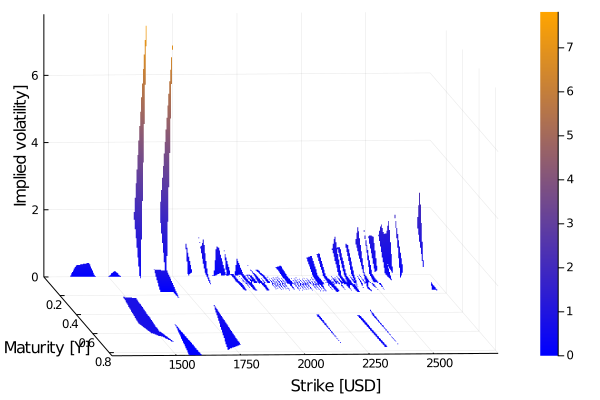

In [22]:
Plots.plot(T, Strikes, impv_mat_real,st=:surface,color=my_cg, camera=(80,30), xlabel="Maturity [Y]", ylabel="Strike [USD]", zlabel="Implied volatility]")

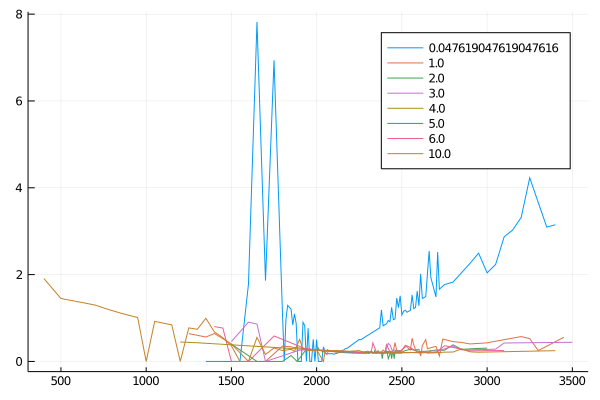

In [23]:
a = Plots.plot(CALLS[1].Strike, replace(impv_real[1], missing=>NaN), label=string(T[1]*12))
for i in 2:length(CALLS)
    Plots.plot!(CALLS[i].Strike, replace(impv_real[i], missing=>NaN), label=string(T[i]*12))
end
display(a)

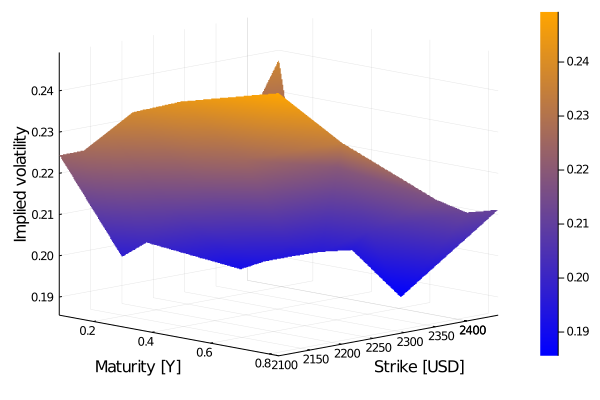

In [24]:
x = [CALLS[i].Strike for i in 1:length(CALLS)]
Strikes = intersect(x[2], x[3], x[4], x[5],  x[7], x[8])

deleteat!(CALLS, 1)
deleteat!(CALLS, 5)

impv_real = [Array{Union{Missing, Float64}}(undef, length(CALLS[i].Strike)) for i in 1:length(CALLS)]
for j in 1:length(CALLS)
    impv_real[j] = CALLS[j]."Implied Volatility" / 100
end

impv_mat_real = Array{Union{Missing, Float64}}(undef, length(Strikes), length(CALLS))
for i in 1:length(CALLS)
    for j in 1:length(Strikes)
        a = -1
        for k in 1:length(CALLS[i].Strike)
            if CALLS[i].Strike[k] == Strikes[j]
                a = k
                break
            end
        end
        impv_mat_real[j,i] = a == -1 ? missing : impv_real[i][a]
    end
end

Plots.plot(T[vcat(2:5, 7:8)], Strikes, impv_mat_real,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Y]", ylabel="Strike [USD]", zlabel="Implied volatility")

In [25]:
#RUT = yf.Ticker("^RUT")
#expr = RUT.options
#opt = [RUT.option_chain(expr[i]) for i in 1:length(expr)]

#for (i, x) in enumerate(opt)
#    x[1].to_csv("DATA_yf/CALL_"*expr[i]*".csv")
#end

#RUT.history(period="5y").to_csv("DATA_yf/Stock.csv")

In [26]:
expr = ("2022-04-04", "2022-04-06", "2022-04-08", "2022-04-11", "2022-04-14", "2022-04-22", "2022-04-29", "2022-05-06", "2022-05-20", "2022-05-31", "2022-06-17", "2022-06-30", "2022-07-15", "2022-07-29", "2022-08-31", "2022-09-16", "2022-09-30", "2022-12-16", "2022-12-30", "2023-03-17", "2023-06-16", "2023-12-15", "2024-12-20")
CALLS = [DataFrame(CSV.File("DATA_yf/CALL_"*x*".csv")) for x in expr]
function Mid_Price( df )
    df[!,:Mid_Price] = ( df.ask .+ df.bid ) ./ 2
end

for i in 1:length(CALLS)
    Mid_Price(CALLS[i])
end

In [27]:
today = Date("2022-03-31") # Dates.today()

T = [bdayscount(:USSettlement, today, Date(x)) / 252 for x in expr]
Strikes = []
for i in 1:length(CALLS)
    Strikes = vcat(Strikes, CALLS[i].strike)
end
#Strikes .= clamp.(Strikes, 1950, 2150) 
Strikes = sort(unique(Strikes))

202-element Vector{Any}:
  400.0
  500.0
  700.0
  750.0
  800.0
  850.0
  900.0
  950.0
 1000.0
 1050.0
 1100.0
 1150.0
 1200.0
    ⋮
 2950.0
 3000.0
 3050.0
 3100.0
 3150.0
 3200.0
 3250.0
 3300.0
 3350.0
 3400.0
 3450.0
 3500.0

In [28]:
x = [CALLS[i].strike for i in 1:length(CALLS)]
mat = vcat(3, 5:7, 9:11,  18, 22)
Strikes = intersect( x[3], x[5], x[6], x[7], x[9],x[10], x[11], x[18], x[22])


10-element Vector{Float64}:
 1500.0
 1950.0
 2000.0
 2050.0
 2100.0
 2150.0
 2200.0
 2250.0
 2300.0
 2350.0

In [29]:
impv_real = [Array{Union{Missing, Float64}}(undef, length(CALLS[i].strike)) for i in 1:length(CALLS[mat])]

for (j, call) in enumerate(CALLS[mat])
    impv_real[j] = call.impliedVolatility
end
print(Strikes)
impv_mat_real = Array{Union{Missing, Float64}}(undef, length(Strikes), length(CALLS[mat]))
for (i, call) in enumerate(CALLS[mat])
    for j in 1:length(Strikes)
        a = -1
        for k in 1:length(call.strike)
            if call.strike[k] == Strikes[j]
                a = k
                #break
            end
        end
        impv_mat_real[j,i] = a == -1 ? missing : impv_real[i][a]
    end
end

[1500.0, 1950.0, 2000.0, 2050.0, 2100.0, 2150.0, 2200.0, 2250.0, 2300.0, 2350.0]

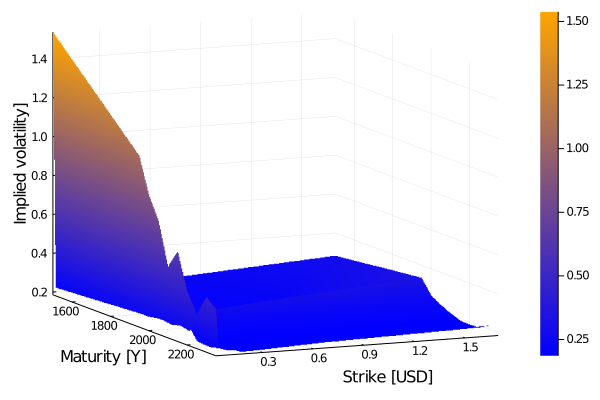

In [30]:
Plots.plot(Strikes, T[mat], impv_mat_real,st=:surface,color=my_cg, camera=(60,30), xlabel="Maturity [Y]", ylabel="Strike [USD]", zlabel="Implied volatility]")

In [31]:
#CSV.write("prova1.csv", Tables.table(impv_mat_real), writeheader=false)

In [32]:
layout = PlotlyJS.Layout(
    title="Implied volatility surface",
    scene_yaxis_title="Maturity [Years]",
    scene_xaxis_title="Moneyness [UDS]",
    scene_zaxis_title="Implied Volatility",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

PlotlyJS.plot(PlotlyJS.surface(
        x=Strikes,
        y=T[mat],
        z=impv_mat_real,
        contours_z=attr(
            show=true,
            usecolormap=true,
            highlightcolor="limegreen",
            project_z=true
        )
), layout)

data: [
  "surface with fields contours, type, x, y, and z"
]

layout: "layout with fields autosize, height, margin, scene, template, title, and width"

In [33]:
for c in CALLS
    for (i,x) in enumerate(c.impliedVolatility)
        if x < 0.1 
            print("ok")
            delete!(c, i)
        end
        if c.volume[i] === missing 
            print("ok")
            delete!(c, i)
        end
    end
end
Strikes = [CALLS[i].strike for i in 1:length(CALLS)]

impv_real = [Array{Union{Missing, Float64}}(undef, length(CALLS[i].strike)) for i in 1:length(CALLS)]
for (j, call) in enumerate(CALLS)
    impv_real[j] = call.impliedVolatility
end


okokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokokok

In [34]:
layout = PlotlyJS.Layout(
    title="Implied volatility",
    scene_yaxis_title="Maturity [Years]",
    scene_xaxis_title="Moneyness [UDS]",
    scene_zaxis_title="Implied volatility",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

plots = [PlotlyJS.scatter(x=CALLS[i].strike, y=repeat([T[i]], length(impv_real[i])), z=impv_real[i], type="scatter3d", name = string(252*T[i]), mode="lines", line=attr(color="red", width=15)) for i in 1:length(impv_real)]

PlotlyJS.plot(plots,layout)

data: [
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z"
]

layout: "layout with fields autosize, height, margin, scene, template, title, and width"

In [35]:
impv_bs = [Array{Union{Missing, Float64}}(undef, length(CALLS[i].strike)) for i in 1:length(CALLS)]
strikes = []
maturit = []
impv_p  = []
point   = Vector{Float64}[]

for (j, call) in enumerate(CALLS[mat])
    impv_real[j] = call.impliedVolatility
end

for j in 1:length(CALLS)
    for i in 1:length(CALLS[j].strike)
        try
            impv_bs[j][i] = CALLS[j].impliedVolatility[i]
            append!(strikes, CALLS[j].strike[i])
            append!(maturit, T[j])
            append!(impv_p, impv_bs[j][i])
            push!(point, [CALLS[j].strike[i], T[j], impv_bs[j][i]])
        catch y
            impv_bs[j][i] = missing
            #println(j,i)
        end
    end
end

point = getindex.(point, [1 2 3])

1201×3 Matrix{Float64}:
 1950.0  0.00793651  0.624821
 2025.0  0.00793651  0.305976
 2060.0  0.00793651  0.130197
 2065.0  0.00793651  0.13215
 2070.0  0.00793651  0.134652
 2075.0  0.00793651  0.133493
 2080.0  0.00793651  0.133706
 2085.0  0.00793651  0.134439
 2090.0  0.00793651  0.132699
 2100.0  0.00793651  0.135049
 2105.0  0.00793651  0.135568
 2110.0  0.00793651  0.137368
 2115.0  0.00793651  0.138894
    ⋮                
 3400.0  1.69841     0.216175
 1500.0  2.70635     0.245323
 1900.0  2.70635     0.270731
 2000.0  2.70635     0.281726
 2100.0  2.70635     0.187518
 2150.0  2.70635     0.244416
 2200.0  2.70635     0.265297
 2400.0  2.70635     0.214122
 2700.0  2.70635     0.218378
 2800.0  2.70635     0.224857
 3150.0  2.70635     0.199616
 3200.0  2.70635     0.202065

In [88]:
layout = PlotlyJS.Layout(
    title="Implied volatility surface tabulated in yf",
    scene_yaxis_title="Maturity [Years]",
    scene_xaxis_title="Moneyness [UDS]",
    scene_zaxis_title="Implied Volatility",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

PlotlyJS.plot(PlotlyJS.scatter(
        x=point[:,1],
        y=point[:,2],
        z=point[:,3],
        color=:species,
        type="scatter3d",
        mode="markers+surfaces",
        marker_size=1.5
        ), layout)

data: [
  "scatter3d with fields color, marker, mode, type, x, y, and z"
]

layout: "layout with fields autosize, height, margin, scene, template, title, and width"

In [37]:
STOCK = DataFrame(CSV.File("DATA_yf/Stock.csv"))
p = PlotlyJS.plot(candlestick(x    =STOCK[!, "Date" ],
                              open =STOCK[!, "Open" ],
                              high =STOCK[!, "High" ],
                              low  =STOCK[!, "Low"  ],
                              close=STOCK[!, "Close"] ),
                  Layout(title="RUT stock Prices",
                         yaxis_title="RUT Stock [USD]")
    )

data: [
  "candlestick with fields close, high, low, open, type, and x"
]

layout: "layout with fields margin, template, title, and yaxis"

In [38]:
Year_Days = 252

function Return( df )
    df[!,:Return    ] =     ( df.Close - lag(df.Close, 1) ) ./ lag(df.Close, 1)
    df[!,:Return_LOG] = log.( df.Close                      ./ lag(df.Close, 1) )
end

Return( STOCK )

function Volatility( Returns, T, daily = false )
    T = floor(Int,T)
    VOL_DAILY  = std(skipmissing(Returns[length(Returns)-T:length(Returns)]))
    VOL_ANNUAL = VOL_DAILY * sqrt(Year_Days)
    if daily==false
        return VOL_ANNUAL
    end
    return VOL_DAILY, VOL_ANNUAL
end

VOL_ANNUAL = [Volatility( STOCK.Return, i*Year_Days ) for i in T]
S0         = STOCK.Close[length(STOCK.Close)]

2091.110107421875

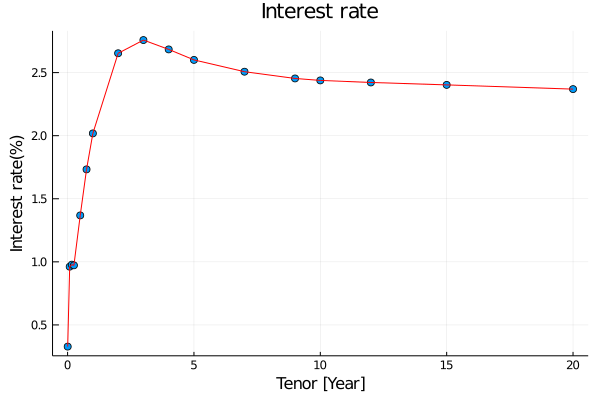

In [39]:
model(t, p) = p[1] .+ p[2] .* t .+ p[3] .* t.^2 .+ p[4] .* t.^3
tdata = [1/252, 1/12, 2/12, 3/12, 6/12, 9/12, 1, 2, 3, 4, 5, 7, 9, 10, 12, 15, 20]
ydata = [0.32814, 0.96167, 0.97770, 0.97236, 1.36804, 1.73292, 2.01817,
         2.65335, 2.75796, 2.68388, 2.60063, 2.50716, #2.45369,
         2.45369, 2.43816, 2.42175, 2.40266, 2.36917]
p0 = [.5, .5, .5, .5]

fit = [curve_fit(model, tdata[i:i+1], ydata[i:i+1], p0) for i in 1:length(tdata)-1] 
param = [fit[i].param for i in 1:length(fit)]

Plots.plot(tdata, ydata, seriestype = :scatter)
for i in 1:length(tdata)-1
    Plots.plot!(tdata[i:i+1], model(tdata, param[Int64(i)])[i:i+1], color="red")
end
Plots.plot!(legend=false, title="Interest rate", xlab = "Tenor [Year]", ylab="Interest rate(%)")
#Plots.plot!(T, r*100, seriestype = :scatter)
#Plots.savefig("figures/Interest_rate.pdf")

In [40]:
points = PlotlyJS.scatter(;x=tdata, y=ydata, mode="markers", marker=attr(size=12,color="red"), name="Tabulated IR")
lines  = Array{GenericTrace{Dict{Symbol, Any}}}(undef, length(tdata)-1)
for i in 1:length(lines)
    lines[i] = PlotlyJS.scatter(;x=tdata[i:i+1], y=model(tdata, param[Int64(i)])[i:i+1],mode="lines",line=attr(color="blue", dash="dashdot"), name="")
end

layout = Layout(title="Interest Rate", yaxis_title="Interest rate [%]", xaxis_title="Tenor [Years]", showlegend=false)

PlotlyJS.plot(vcat(points, lines), layout)
#PlotlyJS.plot(vcat(Plots_bls, Plots_impv, Plots_impv_yf), layout)

data: [
  "scatter with fields marker, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y"
]

layout: "layout with fields margin, showlegend, template, title, xaxis, and yaxis"

In [41]:
typeof(PlotlyJS.scatter())

GenericTrace{Dict{Symbol, Any}}

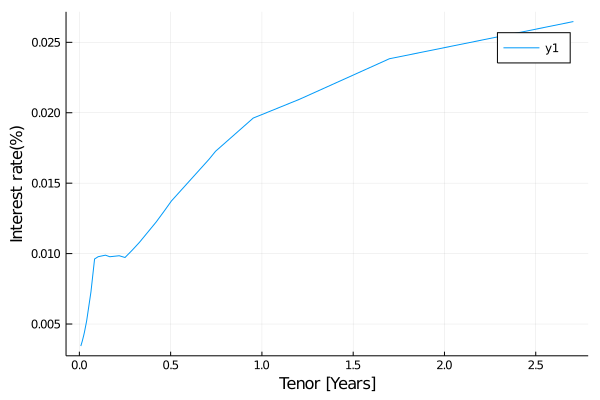

In [42]:
r = Array{Float64}(undef, length(T))
for (i, x) in enumerate(T)
    for j in 1:length(tdata)-1
        if x >= tdata[j] && x < tdata[j+1]
            r[i] = model(x, param[j]) / 100
        end
    end
end
Plots.plot(T, r, xlab="Tenor [Years]", ylab="Interest rate(%)")

In [83]:
Strikes = []
for i in 1:length(CALLS)
    Strikes = vcat(Strikes, CALLS[i].strike)
end
#Strikes .= clamp.(Strikes, 1250, 2750) 
Strikes = sort(unique(Strikes))

opt_price    = Array{Float64}(undef, length(CALLS), length(Strikes))
opt_price_iv = Array{Float64}(undef, length(CALLS), length(Strikes))
opt_delta    = Array{Float64}(undef, length(CALLS), length(Strikes))
opt_gamma    = Array{Float64}(undef, length(CALLS), length(Strikes))
opt_theta    = Array{Float64}(undef, length(CALLS), length(Strikes))
opt_vega     = Array{Float64}(undef, length(CALLS), length(Strikes))
opt_impv     = Array{Union{Missing, Float64}}(undef, length(CALLS), length(Strikes))
for (i, c) in enumerate(CALLS)
    for (j,k) in enumerate(Strikes)
        opt_price[i, j] = blsprice(S0, k, r[i], T[i], VOL_ANNUAL[i])
        #println(T[i],  " ", k, " ", " ", r[i], " ", opt_price[i,j])
        opt_delta[i, j] = blsdelta(S0, k, r[i], T[i], VOL_ANNUAL[i])
        opt_gamma[i, j] = blsgamma(S0, k, r[i], T[i], VOL_ANNUAL[i])
        opt_theta[i, j] = blstheta(S0, k, r[i], T[i], VOL_ANNUAL[i])
        opt_vega[ i, j] = blsvega( S0, k, r[i], T[i], VOL_ANNUAL[i])
        try
            opt_impv[ i, j] = blsimpv( S0, k, r[i], T[i], opt_price[i,j])
            #opt_price_iv[i,j] = blsprice(S0, k, r[i], T[i], opt_impv)
        catch y
            opt_impv[ i, j] = missing
        end
    end
end

println(VOL_ANNUAL)

[0.24163681744774257, 0.28431750172274806, 0.23971261789374468, 0.248917474216401, 0.22566844925891666, 0.2523138951219757, 0.2662056343900915, 0.2773380364025747, 0.2755277536326151, 0.26547403763119115, 0.2748350467425812, 0.26829150801182206, 0.26215013639943907, 0.26555214358112594, 0.2548597276309965, 0.2479616198006432, 0.24192024526747616, 0.22884199489684035, 0.21998616358695133, 0.22826265337889712, 0.22697192745499017, 0.3090181553933714]


In [84]:
blsprice(S0, 500, .003435184621398693, .007936507936507936, .24163681744774257)

1591.1237389210594

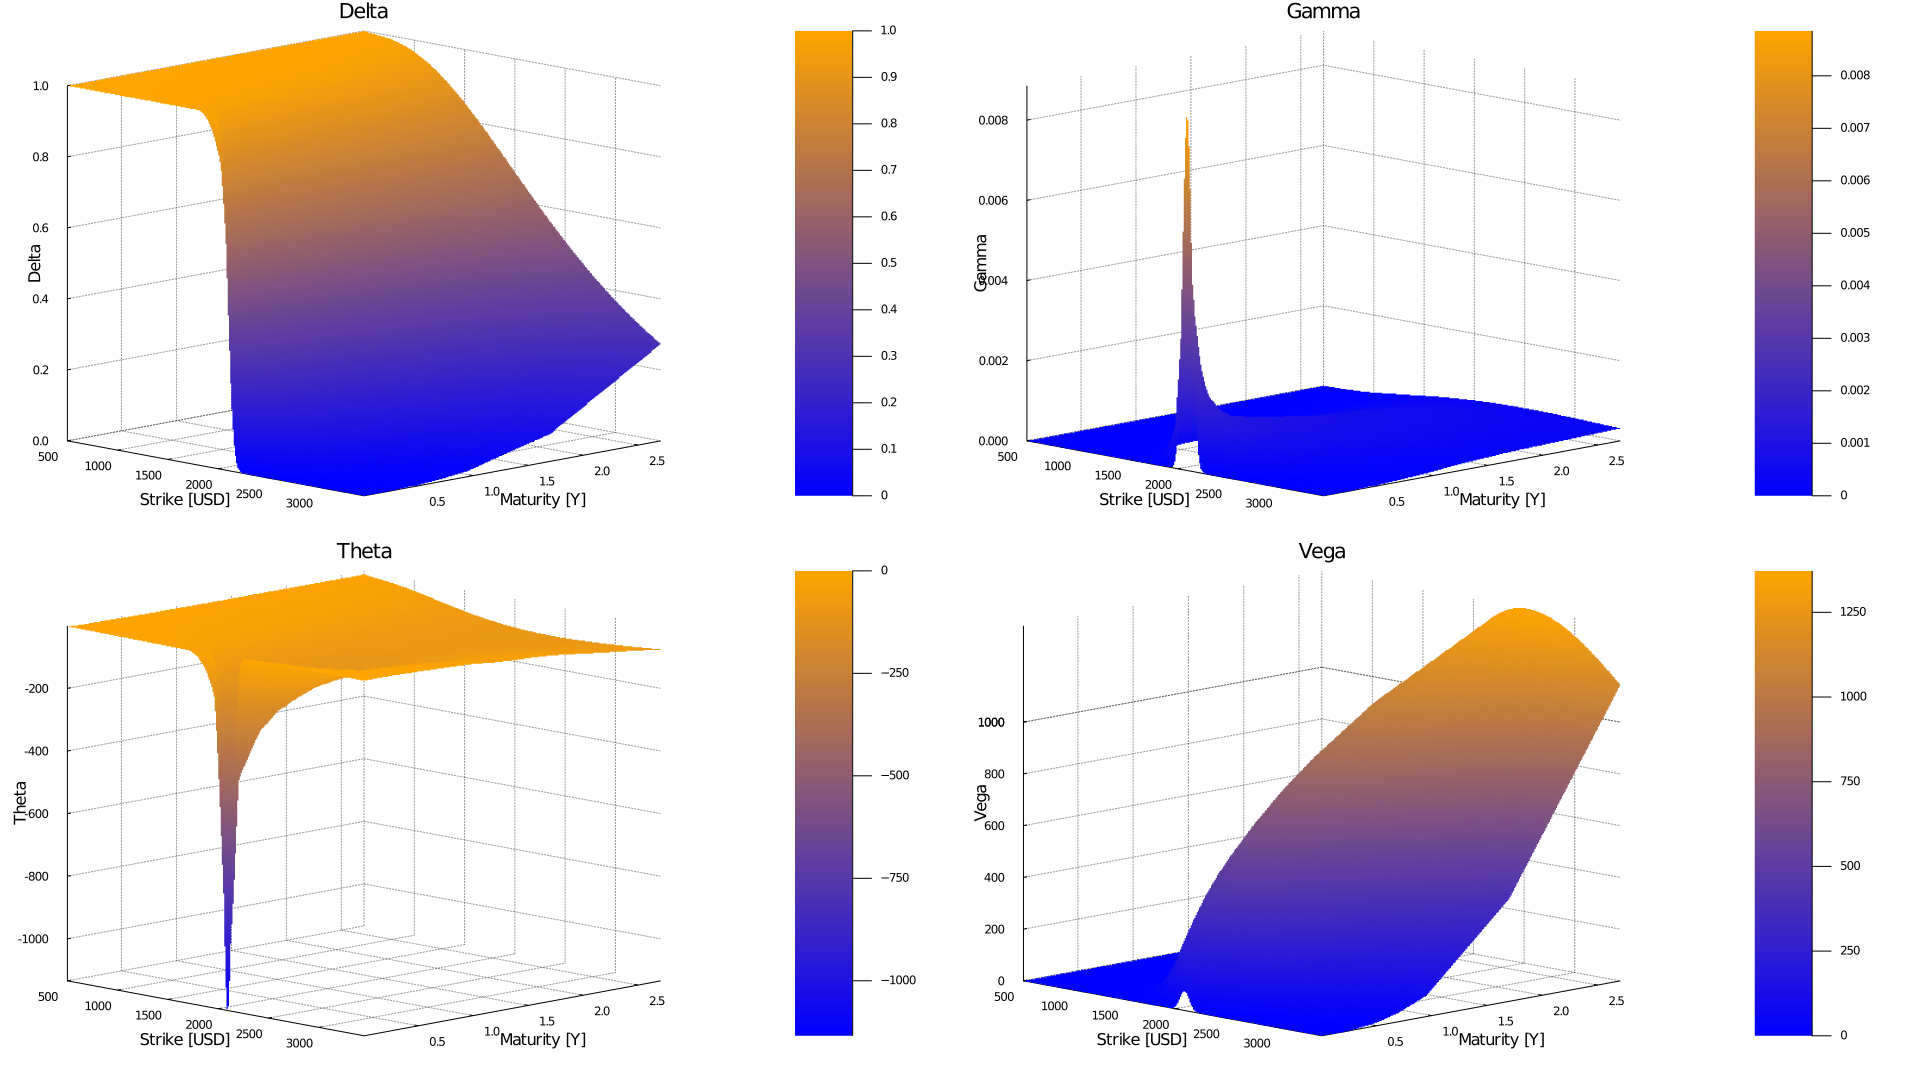

In [70]:
delta = Plots.plot(title = "Delta",Strikes,T,opt_delta,st=:surface,color=my_cg, camera=(45,30), xlabel="Strike [USD]", ylabel="Maturity [Y]", zlabel="Delta")
gamma = Plots.plot(title = "Gamma",Strikes,T,opt_gamma,st=:surface,color=my_cg, camera=(45,30), xlabel="Strike [USD]", ylabel="Maturity [Y]", zlabel="Gamma")
theta = Plots.plot(title = "Theta",Strikes,T,opt_theta,st=:surface,color=my_cg, camera=(45,30), xlabel="Strike [USD]", ylabel="Maturity [Y]", zlabel="Theta")
vega  = Plots.plot(title = "Vega",Strikes,T,opt_vega, st=:surface,color=my_cg, camera=(45,30), xlabel="Strike [USD]", ylabel="Maturity [Y]", zlabel="Vega")
pimpv = Plots.plot(title = "Implied Volatility",Strikes,T,opt_impv, st=:surface,color=my_cg, camera=(45,30), xlabel="Strike [USD]", ylabel="Maturity [Y]", zlabel="Implied VOlatility")


l = @layout [
    a b
    c d e
]
Plots.plot(  delta, gamma, theta, vega, layout = (2, 2), size = (1920, 1080))
#price,
Plots.plot!(#gridcolor=:green,
            gridlinestyle=:dot,
            gridlinewidth=1,
            gridalpha=0.8)
#Plots.savefig("figures/Greeks_RUT.pdf")

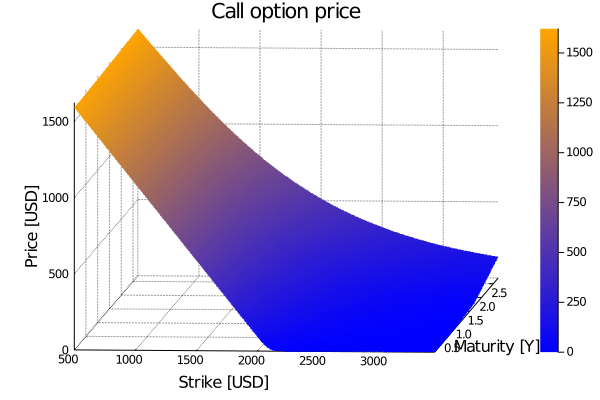

In [71]:
price = Plots.plot(title = "Call option price",Strikes,T,opt_price,st=:surface,color=my_cg, camera=(10,30), xlabel="Strike [USD]", ylabel="Maturity [Y]", zlabel="Price [USD]")

Plots.plot(  price )

Plots.plot!(#gridcolor=:green,
            gridlinestyle=:dot,
            gridlinewidth=1,
            gridalpha=0.8)
#Plots.savefig("figures/Price_RUT.pdf")

In [86]:
layout = PlotlyJS.Layout(
    title="Call option price surface",
    scene_yaxis_title="Moneyness [USD]",
    scene_xaxis_title="Maturity [Years]",
    scene_zaxis_title="Call option price [USD]",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

PlotlyJS.plot(PlotlyJS.surface(
        x=T,
        y=sort(Strikes),
        z=opt_price,
        contours_z=attr(
            show=true,
            usecolormap=true,
            highlightcolor="limegreen",
            project_z=true
        )
), layout)

data: [
  "surface with fields contours, type, x, y, and z"
]

layout: "layout with fields autosize, height, margin, scene, template, title, and width"

In [59]:
"""strike    = 2090.0
real_call = []
call_bs   = []
t_eff     = []
r_eff     = copy(r)
vol_eff   = copy(VOL_ANNUAL)
calls     = copy(CALLS)
id_del    = []
#REAL_CALL = [CALLS[i][CALLS[i].strike == strike, "Mid_Price"][1] for i in 1:length(CALLS)]
for i in length(calls):-1:1
    try
        append!(real_call, CALLS[i][CALLS[i].strike .== strike, "Mid_Price"][1])
        append!(t_eff, T[i])
    catch y
        println( i, " NOT FOUND")
        append!(id_del, i)
        #deleteat!(r_eff, i)
        #deleteat!(vol_eff, i)
    end
end

for i in length(t_eff):-1:1
    append!(call_bs,   blsprice(S0, strike, r[i], t_eff[i], vol_eff[i]))
end"""

"strike    = 2090.0\nreal_call = []\ncall_bs   = []\nt_eff     = []\nr_eff     = copy(r)\nvol_eff   = copy(VOL_ANNUAL)\ncalls     = copy(CALLS)\nid_del    = []\n#REAL_CALL = [CALLS[i][CALLS[i].strike == strike, \"Mid_Price\"][1] for i in 1:length(CALLS)]\nfor i in length(calls):-1:1" ⋯ 98 bytes ⋯ "append!(t_eff, T[i])\n    catch y\n        println( i, \" NOT FOUND\")\n        append!(id_del, i)\n        #deleteat!(r_eff, i)\n        #deleteat!(vol_eff, i)\n    end\nend\n\nfor i in length(t_eff):-1:1\n    append!(call_bs,   blsprice(S0, strike, r[i], t_eff[i], vol_eff[i]))\nend"

In [60]:
deleteat!(CALLS, 19)
deleteat!(T, 19)
deleteat!(VOL_ANNUAL, 19)


22-element Vector{Float64}:
 0.24163681744774257
 0.28431750172274806
 0.23971261789374468
 0.248917474216401
 0.22566844925891666
 0.2523138951219757
 0.2662056343900915
 0.2773380364025747
 0.2755277536326151
 0.26547403763119115
 0.2748350467425812
 0.26829150801182206
 0.26215013639943907
 0.26555214358112594
 0.2548597276309965
 0.2479616198006432
 0.24192024526747616
 0.22884199489684035
 0.21998616358695133
 0.22826265337889712
 0.22697192745499017
 0.3090181553933714

In [61]:
strike1   = 2090.0
strike2   = 2100.0
strike3   = 2110.0
strike4   = 2070.0
strike5   = 2300.0
real_call = []
call_bs   = []
strikes   = []
impv      = []
for i in 1:length(CALLS)
    try
        append!(real_call, CALLS[i][CALLS[i].strike .== strike1, "Mid_Price"][1])
        append!(impv, CALLS[i][CALLS[i].strike .== strike1, "impliedVolatility"][1]) / 100
        append!(strikes, strike1)
    catch y
        try
            append!(real_call, CALLS[i][CALLS[i].strike .== strike2, "Mid_Price"][1])
            append!(impv, CALLS[i][CALLS[i].strike .== strike2, "impliedVolatility"][1]) / 100
            append!(strikes, strike2)
        catch y
            try
                append!(real_call, CALLS[i][CALLS[i].strike .== strike3, "Mid_Price"][1])
                append!(impv, CALLS[i][CALLS[i].strike .== strike3, "impliedVolatility"][1]) / 100
                append!(strikes, strike3)
            catch y
                try
                    append!(real_call, CALLS[i][CALLS[i].strike .== strike4, "Mid_Price"][1])
                    append!(impv, CALLS[i][CALLS[i].strike .== strike4, "impliedVolatility"][1]) / 100
                    append!(strikes, strike4)
                catch y
                    try
                        append!(real_call, CALLS[i][CALLS[i].strike .== strike5, "Mid_Price"][1])
                        append!(impv, CALLS[i][CALLS[i].strike .== strike5, "impliedVolatility"][1]) / 100
                        append!(strikes, strike5)
                    catch y
                        println("NO")
                        println(i)
                   end
                end
            end
        end
    end
end

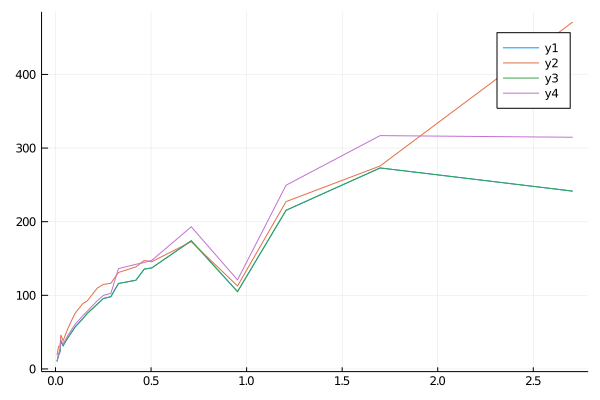

In [62]:
t_eff = copy(T)
id_del = []
for i in 1:length(real_call)
    if real_call[i] == 0
        append!(id_del, i)
    end
end

price_RUT       = Array{Float64}(undef, length(real_call))
iv              = Array{Float64}(undef, length(real_call))
price_RUT_iv    = Array{Float64}(undef, length(real_call))
price_RUT_iv_yf = Array{Float64}(undef, length(real_call))
for i in 1:length(real_call)
    price_RUT[      i] = blsprice(S0, strikes[i], r[i], t_eff[i], VOL_ANNUAL[i])
    iv[             i] = blsimpv( S0, strikes[i], r[i], t_eff[i], real_call[i])
    price_RUT_iv[   i] = blsprice(S0, strikes[i], r[i], t_eff[i], iv[i])
    price_RUT_iv_yf[i] = blsprice(S0, strikes[i], r[i], t_eff[i], impv[i])
end   

Plots.plot()
Plots.plot(t_eff, real_call)
Plots.plot!(t_eff, price_RUT)
Plots.plot!(t_eff, price_RUT_iv)
Plots.plot!(t_eff, price_RUT_iv_yf)

In [63]:
colors = ["red", "blue", "yellow", "green", "violet", "black"]
Plots_real    = PlotlyJS.scatter(;x=t_eff, y=real_call,    mode="markers+lines", line=attr(color="red", dash="solid"),   name="Real Mid-Price")
Plots_bls     = PlotlyJS.scatter(;x=t_eff, y=price_RUT,    mode="markers+lines", line=attr(color="blue", dash="dashdot"), name="BS hist. vol.")
Plots_impv    = PlotlyJS.scatter(;x=t_eff, y=price_RUT_iv, mode="markers+lines", line=attr(color="green", dash="dash"), name="BS I.V.")
Plots_impv_yf = PlotlyJS.scatter(;x=t_eff, y=price_RUT_iv_yf, mode="markers+lines", line=attr(color="yellow", dash="dashdot"), name="BS I.V yf")

layout = Layout(title="RUT option prices ATM", yaxis_title="Option prices [USD]", xaxis_title="Time to maturity [Years]")

PlotlyJS.plot(vcat(Plots_real, Plots_bls, Plots_impv, Plots_impv_yf), layout)
#PlotlyJS.plot(vcat(Plots_bls, Plots_impv, Plots_impv_yf), layout)

data: [
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y"
]

layout: "layout with fields margin, template, title, xaxis, and yaxis"

In [64]:
plot_hist = PlotlyJS.scatter(;x=t_eff, y=VOL_ANNUAL, mode="markers+lines", line=attr(color="red", dash="solid"),name="Hist. vol.")
plot_impv = PlotlyJS.scatter(;x=t_eff, y=iv, mode="markers+lines", line=attr(color="blue", dash="dashdot"),name="Imp. vol.")
plot_ivyf = PlotlyJS.scatter(;x=t_eff, y=impv, mode="markers+lines", line=attr(color="green", dash="dash"),name="Imp. vol. yf")
layout = Layout(title="RUT Volatility ATM", yaxis_title="Volatility", xaxis_title="Time to maturity [Years]")

PlotlyJS.plot(vcat(plot_hist,plot_impv, plot_ivyf), layout)

data: [
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y"
]

layout: "layout with fields margin, template, title, xaxis, and yaxis"

In [89]:
impv_bs = [Array{Union{Missing, Float64}}(undef, length(CALLS[i].strike)) for i in 1:length(CALLS)]
strikes = []
maturit = []
impv_p  = []
point   = Vector{Float64}[]
for j in 1:length(CALLS)
    for i in 1:length(CALLS[j].strike)
        try
            impv_bs[j][i] = blsimpv(S0, CALLS[j].strike[i], r[j], T[j], CALLS[j].Mid_Price[i])
            append!(strikes, CALLS[j].strike[i])
            append!(maturit, T[j])
            append!(impv_p, impv_bs[j][i])
            push!(point, [CALLS[j].strike[i], T[j], impv_bs[j][i]])
        catch y
            impv_bs[j][i] = missing
            #println(j,i)
        end
    end
end
#pimpv_bs = Plots.plot(title = "Implied Volatility",strikes,maturit,impv_bs, st=:surface,color=my_cg, camera=(45,30), xlabel="Strike [USD]", ylabel="Maturity [Y]", zlabel="Implied VOlatility")

#Plots.plot(pimpv_bs)
point = getindex.(point, [1 2 3])


1092×3 Matrix{Float64}:
 2065.0  0.00793651  0.0951534
 2070.0  0.00793651  0.112401
 2075.0  0.00793651  0.118932
 2080.0  0.00793651  0.124253
 2085.0  0.00793651  0.128012
 2090.0  0.00793651  0.129279
 2100.0  0.00793651  0.132153
 2105.0  0.00793651  0.133817
 2110.0  0.00793651  0.135185
 2115.0  0.00793651  0.137087
 2120.0  0.00793651  0.13916
 2125.0  0.00793651  0.142828
 2130.0  0.00793651  0.146918
    ⋮                
 3350.0  1.69841     0.1869
 3400.0  1.69841     0.187961
 1900.0  2.70635     0.206712
 2000.0  2.70635     0.22493
 2100.0  2.70635     0.13055
 2150.0  2.70635     0.193051
 2200.0  2.70635     0.216478
 2400.0  2.70635     0.174524
 2700.0  2.70635     0.184465
 2800.0  2.70635     0.194572
 3150.0  2.70635     0.172516
 3200.0  2.70635     0.175087

In [90]:
Tables.table(point)

Tables.MatrixTable{Matrix{Float64}} with 1092 rows, 3 columns, and schema:
 :Column1  Float64
 :Column2  Float64
 :Column3  Float64

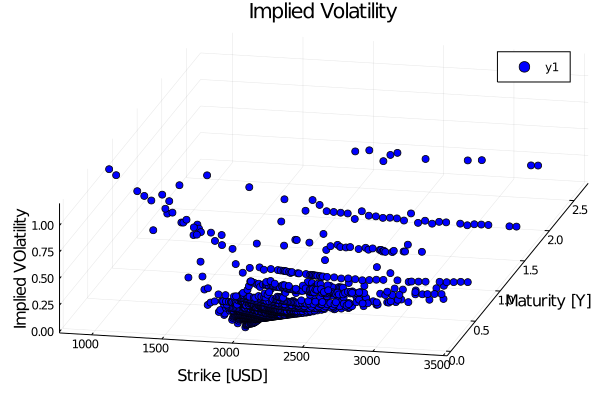

In [91]:
pimpv = Plots.scatter(title = "Implied Volatility",point[:,1],point[:,2],point[:,3],color=my_cg, camera=(20,65), xlabel="Strike [USD]", ylabel="Maturity [Y]", zlabel="Implied VOlatility")


In [92]:
layout = PlotlyJS.Layout(
    title="Implied volatility surface",
    scene_yaxis_title="Maturity [Years]",
    scene_xaxis_title="Moneyness [UDS]",
    scene_zaxis_title="Implied Volatility",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

PlotlyJS.plot(PlotlyJS.scatter(
        x=point[:,1],
        y=point[:,2],
        z=point[:,3],
        color=:species,
        type="scatter3d",
        mode="markers+surfaces",
        marker_size=1.5
        ), layout)

data: [
  "scatter3d with fields color, marker, mode, type, x, y, and z"
]

layout: "layout with fields autosize, height, margin, scene, template, title, and width"

In [ ]:
point[:,3]

In [ ]:
layout = PlotlyJS.Layout(
    title="Call option price surface",
    scene_yaxis_title="Spot price [USD]",
    scene_xaxis_title="Maturity [Years]",
    scene_zaxis_title="Call option price [USD]",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

PlotlyJS.plot(PlotlyJS.surface(
        x=T,
        y=Strikes,
        z=price,
        contours_z=attr(
            show=true,
            usecolormap=true,
            highlightcolor="limegreen",
            project_z=true
        )
), layout)

In [ ]:
layout = PlotlyJS.Layout(
    title="Delta surface",
    scene_yaxis_title="Spot price [USD]",
    scene_xaxis_title="Maturity [Years]",
    scene_zaxis_title="Delta",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

PlotlyJS.plot(PlotlyJS.surface(
        x=T,
        y=S,
        z=delta,
        contours_z=attr(
            show=true,
            usecolormap=true,
            highlightcolor="limegreen",
            project_z=true
        )
), layout)

In [ ]:
layout = PlotlyJS.Layout(
    title="Gamma surface",
    scene_yaxis_title="Spot price [USD]",
    scene_xaxis_title="Maturity [Years]",
    scene_zaxis_title="Gamma",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

PlotlyJS.plot(PlotlyJS.surface(
        x=T,
        y=S,
        z=gamma,
        contours_z=attr(
            show=true,
            usecolormap=true,
            highlightcolor="limegreen",
            project_z=true
        )
), layout)

In [ ]:
layout = PlotlyJS.Layout(
    title="Theta surface",
    scene_yaxis_title="Spot price [USD]",
    scene_xaxis_title="Maturity [Years]",
    scene_zaxis_title="Theta",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

PlotlyJS.plot(PlotlyJS.surface(
        x=T,
        y=S,
        z=theta,
        contours_z=attr(
            show=true,
            usecolormap=true,
            highlightcolor="limegreen",
            project_z=true
        )
), layout)

In [ ]:
layout = PlotlyJS.Layout(
    title="Vega surface",
    scene_yaxis_title="Spot price [USD]",
    scene_xaxis_title="Maturity [Years]",
    scene_zaxis_title="Vega",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

PlotlyJS.plot(PlotlyJS.surface(
        x=T,
        y=S,
        z=vega,
        contours_z=attr(
            show=true,
            usecolormap=true,
            highlightcolor="limegreen",
            project_z=true
        )
), layout)

In [ ]:
layout = PlotlyJS.Layout(
    title="Rho surface",
    scene_yaxis_title="Spot price [USD]",
    scene_xaxis_title="Maturity [Years]",
    scene_zaxis_title="Rho",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

PlotlyJS.plot(PlotlyJS.surface(
        x=T,
        y=S,
        z=rho,
        contours_z=attr(
            show=true,
            usecolormap=true,
            highlightcolor="limegreen",
            project_z=true
        )
), layout)

In [ ]:
K = 100
r = .01
vol = 0.3

S = collect(60:5:140)
T = vcat(collect(.1:.1:.9), collect(1:1:5))

price  = Array{Float64}(undef, length(S), length(T))
delta  = Array{Float64}(undef, length(S), length(T))
gamma  = Array{Float64}(undef, length(S), length(T))
theta  = Array{Float64}(undef, length(S), length(T))
vega   = Array{Float64}(undef, length(S), length(T))
rho    = Array{Float64}(undef, length(S), length(T))
lambda = Array{Float64}(undef, length(S), length(T))
psi    = Array{Float64}(undef, length(S), length(T))
vanna  = Array{Float64}(undef, length(S), length(T))
impv   = Array{Float64}(undef, length(S), length(T))

for i in 1:length(S), j in 1:length(T)
    price[i,j]  = blsprice( S[i], K, r, T[j], vol)
    delta[i,j]  = blsdelta( S[i], K, r, T[j], vol)
    gamma[i,j]  = blsgamma( S[i], K, r, T[j], vol)
    theta[i,j]  = blstheta( S[i], K, r, T[j], vol)
    vega[i,j]   = blsvega(  S[i], K, r, T[j], vol)
    rho[i,j]    = blsrho(   S[i], K, r, T[j], vol)
    lambda[i,j] = blslambda(S[i], K, r, T[j], vol)
    psi[i,j]    = blspsi(   S[i], K, r, T[j], vol)
    vanna[i,j]  = blsvanna( S[i], K, r, T[j], vol)
    impv[i,j]   = blsimpv(  S[i], K, r, T[j], price[i,j] )
end

In [ ]:
Plots.plot(T, S, delta,color=my_cg,st=:surface,camera=(45,45))

In [ ]:

Plots.plot(T, S, gamma,color=my_cg,st=:surface,camera=(45,20))

In [51]:
?blsprice()

Black & Scholes Price for European Options

```
	Price=blsprice(S0,K,r,T,σ,d=0.0,FlagIsCall=true)
```

Where:

```
	S0         = Value of the Underlying.
	K          = Strike Price of the Option.
	r          = Zero Rate.
	T          = Time to Maturity of the Option.
	σ          = Implied Volatility
	d          = Implied Dividend of the Underlying.
	FlagIsCall = true for Call Options, false for Put Options.

	Price      = price of the European Option.
```

# Example

```julia-repl
julia> blsprice(10.0,10.0,0.01,2.0,0.2,0.01)
1.1023600107733191
```
